# Staff-Graded Network Models

### Part (a)

[110  27  63]


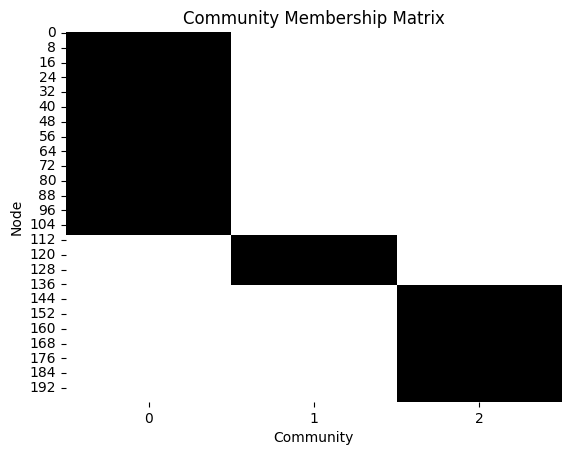

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import warnings; warnings.filterwarnings('ignore')


pi = [0.5, 0.15, 0.35]  # NOTE: This is a trinomial distrib, as there are 3 clusters
B = np.array([[0.9, 0.15, 0.25],
                [0.15, 0.75, 0.05],
                [0.25, 0.05, 0.6]])
rho = 1
n = 200
np.random.seed(1)

theta = np.random.multinomial(n=1, pvals=pi, size=(n))
sorter = np.argsort(np.argmax(theta, axis=1))
theta_sort = theta[sorter]
print(block_counts := np.sum(theta, axis=0))

# Create a heatmap using seaborn
sns.heatmap(theta_sort, cmap="binary", cbar=False)

# Add title and labels
plt.title('Community Membership Matrix')
plt.xlabel('Community')
plt.ylabel('Node')
plt.show()


The expected number of members in the first community is 0.5 * 200 = 100. For the second community, the expected number of members is 0.15 * 200 = 30. For the third community, the expected number of members is 0.35 * 200 = 70.

For our particular intance of theta, we observe 110 members in the first community, 27 members in the second community, and 63 members in the third community.

### Part (b)

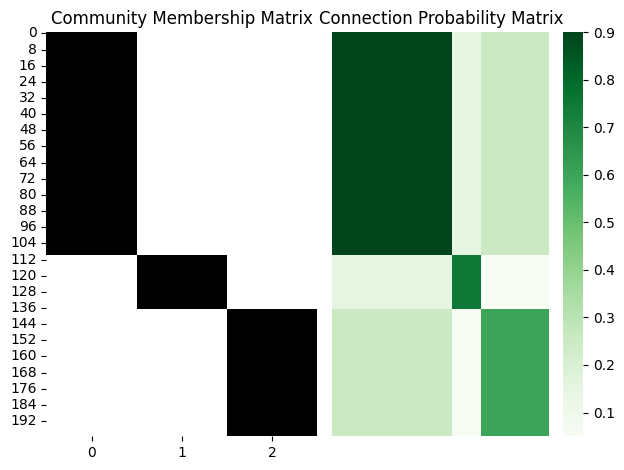

P[1,3]:
0.9

P[197,199]:
0.6

P[192,4]:
0.25



In [6]:
# Initialize blank P
P = np.zeros((n,n))
break1 = block_counts[0]
break2 = break1 + block_counts[1]
break3 = break2 + block_counts[2]

# Fill P
P[0:break1, 0:break1] = B[0,0]
P[break1:break2, 0:break1] = B[0,1]
P[0:break1, break1:break2] = B[0,1]
P[break2:break3, 0:break1] = B[0,2]
P[0:break1, break2:break3] = B[0,2]
P[break1:break2, break1:break2] = B[1,1]
P[break2:break3, break2:break3] = B[2,2]
P[break1:break2, break2:break3] = B[1,2]
P[break2:break3, break1:break2] = B[1,2]

# Create subplots and plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first plot
sns.heatmap(theta_sort, cmap="binary", cbar=False)
plt.title('Community Membership Matrix')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second plot
sns.heatmap(P, cmap='Greens', xticklabels=False, yticklabels=False)
plt.title('Connection Probability Matrix')

plt.tight_layout()
plt.show()

# Show requested indeces of P
print(f'P[1,3]:\n{P[1,3]}\n')
print(f'P[197,199]:\n{P[197,199]}\n')
print(f'P[192,4]:\n{P[192,4]}\n')

### Part (c)

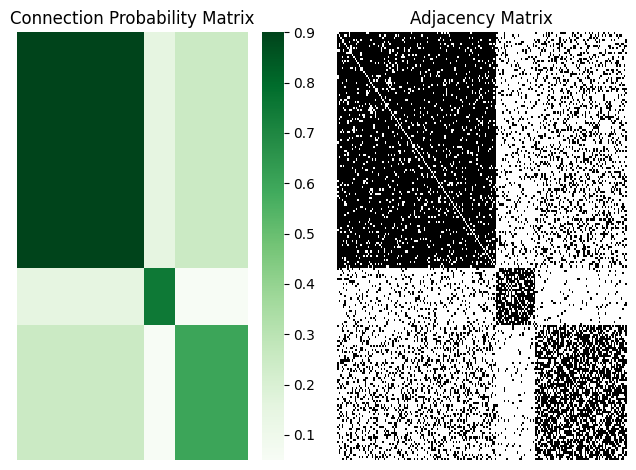

In [7]:
# Fill R using bernoulli with probabilities from P
R = np.random.binomial(n=1, p=P)
R = R - np.diag(np.diag(R))

# Make A out of symmetrical upper triangles of R
R1 = np.triu(R)
A = R1 + R1.T

# Create subplots and plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the second plot
sns.heatmap(P, cmap='Greens', xticklabels=False, yticklabels=False)
plt.title('Connection Probability Matrix')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second plot
sns.heatmap(A, cmap='Greys', xticklabels=False, yticklabels=False, cbar=False)
plt.title('Adjacency Matrix')

plt.tight_layout()
plt.show()

### Part (d)

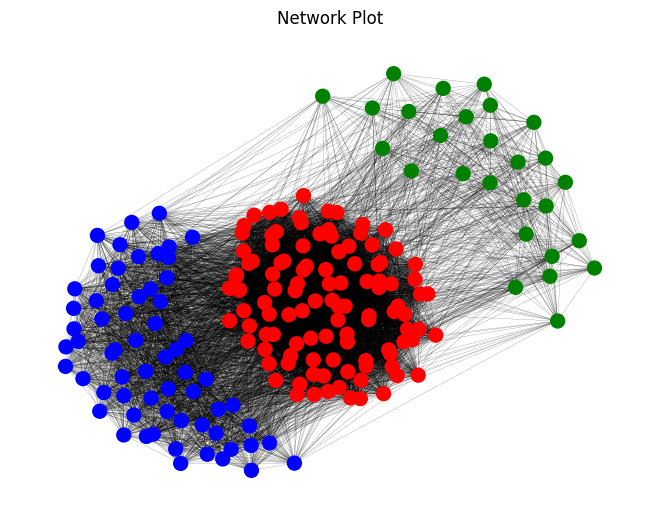

In [8]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A)

# Create a list of colors based on the community membership
cmap = []
for node in G:
    if node < 110:
        cmap.append('red')
    elif node < (110+27):
        cmap.append('green')
    else:
        cmap.append('blue')



# Draw the nodes with different colors for each community
nx.draw(G, with_labels=False, node_size=100, width=0.1, node_color=cmap, cmap='tab10')
plt.title('Clustered Network Plot')

# Show the plot
plt.show()

The connection density is greatest in community one, shown in red. Community three in blue has the second-highest connection density. Community two in green has the lowest connection density.

The red community has many inter-community connections with both the blue and green communities. There are very few connections between the green and blue communities.

In the entire plot, the greatest connection density exists within the red community. The lowest connection density exists between the blue and green communities.